In [351]:
import csv

with open('baseSeparada.csv', 'r', encoding='utf-8') as entrada:
    with open('baseAtacado.csv', 'w', encoding='utf-8', newline='') as saida_b:
        leitor = csv.reader(entrada)
        escritor2 = csv.writer(saida_b)
        escritor2.writerow(['ID','Ano','Mes','Frase Original',
                           'Países_Atacantes','Estatais Atacantes','Não Estatais atacantes',
                           'Países_Atacados','Estatais atacadas','Não estatais atacadas',
                           'Ferramenta','Meios','Efeito','Ações Cibernéticas'])
        i = 1
        next(leitor)
        for linhas in leitor:
            if len(linhas[15]) == 2:
                continue  # Ignora a linha e passa para a próxima
            else:
                if 'United States' in linhas[15]:
                    id2 = i
                    ano = linhas[2]
                    mes = linhas[3]
                    descricao = linhas[4]
                    paises_atacantes = linhas[10]
                    estatais_atacantes = linhas[11]
                    naoEstatais_atacantes = linhas[12]
                    paises_atacados = linhas[15]
                    estatais_atacadas = linhas[16]
                    naoEstatais_atacados = linhas[17]
                    ferramenta = linhas[18]
                    meios = linhas[19]
                    efeito = linhas[20]
                    acoesCiber = linhas[21]
                    insercao = [id2, ano, mes, descricao, paises_atacantes, estatais_atacantes, naoEstatais_atacantes,
                                paises_atacados, estatais_atacadas, naoEstatais_atacados,
                                ferramenta, meios, efeito,acoesCiber]
                    escritor2.writerow(insercao)
                    i += 1

# Verificando o conteúdo do arquivo final
with open('baseAtacado.csv', 'r', encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    for linhas in leitor:
        print(linhas)


['ID', 'Ano', 'Mes', 'Frase Original', 'Países_Atacantes', 'Estatais Atacantes', 'Não Estatais atacantes', 'Países_Atacados', 'Estatais atacadas', 'Não estatais atacadas', 'Ferramenta', 'Meios', 'Efeito', 'Ações Cibernéticas']
['1', '2020', 'December', 'North Korean hackers targeted U.S. pharmaceutical companies Johnson Johnson and Novavax, both working on experimental vaccines, in an attempt to obtain information on COVID-19.', "['North Korea']", '[]', "['hackers']", "['United States']", '[]', "['companies', 'pharmaceutical']", '[]', '[]', '[]', 'Crime Cibernético']
['2', '2020', 'December', 'Over 200 organizations around the world —including multiple US government agencies —were revealed to have been breached by Russian hackers who compromised the software provider SolarWinds and exploited their access to monitor internal operations exfiltrate data.', "['Russia']", '[]', "['hackers']", "['United States', 'world']", "['government_agencies']", '[]', '[]', "['software']", "['agencies', 

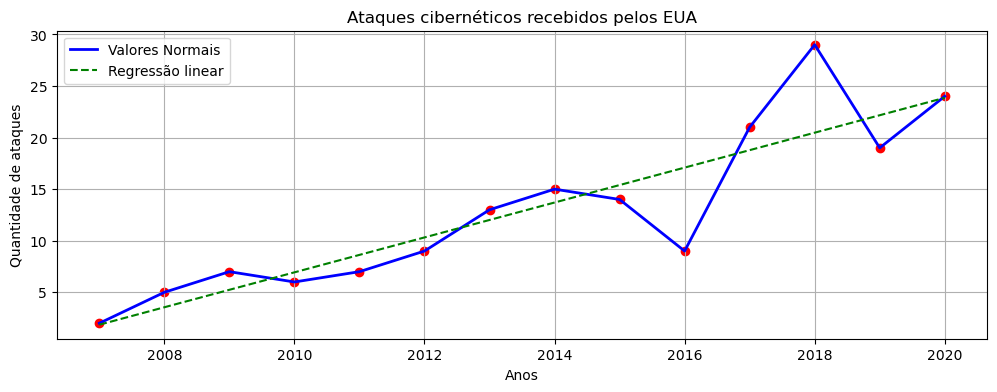

In [382]:
import matplotlib.pyplot as plt
import csv
import numpy as np

tudo = []
eixox = []
eixoy = []
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    next(leitor)
    for linhas in leitor:
        if len(linhas) == 0:
            pass
        else:
            tudo.append(linhas[1])
eixox = list(set(tudo))
eixox.sort()
for elemento in eixox:
    j = 0
    for item in tudo:
        if elemento == item:
            j +=1
    eixoy.append(j)
# Convertendo anos para valores numéricos em numpy
eixox = np.array([int(ano) for ano in eixox]).reshape(-1, 1)
eixoy = np.array(eixoy)

plt.figure(figsize=(12, 4))

plt.plot(eixox,eixoy,'b',lw=2,label='Valores Normais')
plt.scatter(eixox,eixoy,color='r')

# Calculando a regressão linear
reg = np.c_[np.ones((len(eixox), 1)), eixox]
coeficiente = np.linalg.inv(reg.T.dot(reg)).dot(reg.T).dot(eixoy)

# Imprimindo os coeficientes
intercept, slope = coeficiente[0], coeficiente[1]

# Gerando pontos para a linha de regressão
regx_a = np.array([min(eixox), max(eixox)])
regx_b = np.c_[np.ones(2), regx_a]
regy = regx_b.dot(coeficiente)

plt.plot(regx_a,regy,color='green',label='Regressão linear',linestyle='--')

plt.title("Ataques cibernéticos recebidos pelos EUA")
plt.xlabel("Anos")
plt.ylabel("Quantidade de ataques")
plt.grid()
plt.legend()
# Salvar o gráfico na pasta "plots"
plt.savefig('1_01_AtaquesCiberRecebidosEUA.png')
plt.show()

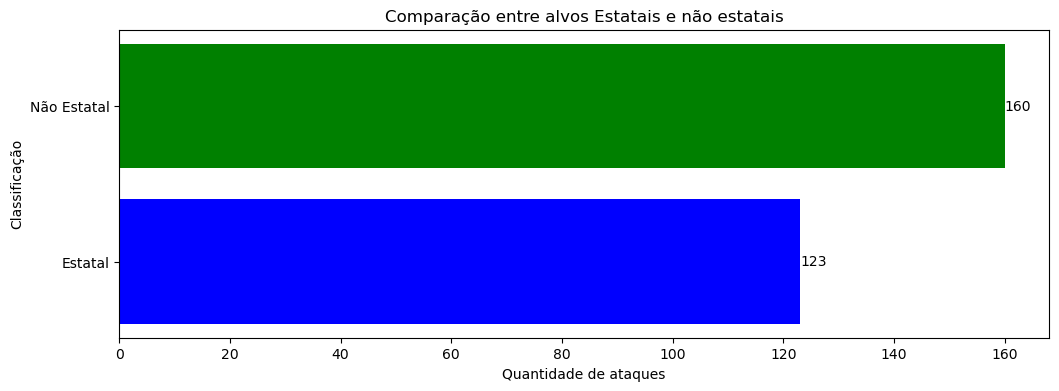

In [383]:
import matplotlib.pyplot as plt
import csv

# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    contagem_estatal = 0
    contagem_naoEstatal = 0
    
    # Contando o número de ataques em alvos estatais e não estatais
    for linhas in leitor:
        estatal_atacado = eval(linhas[8])
        contagem_estatal += len(estatal_atacado)
        
        naoEstatal_atacado = eval(linhas[9])
        contagem_naoEstatal += len(naoEstatal_atacado)

# Definindo os dados para o gráfico
eixoy = ['Estatal','Não Estatal']
eixox = [contagem_estatal, contagem_naoEstatal]

# Criando a figura com o tamanho desejado
plt.figure(figsize=(12, 4))

# Criando o gráfico de barras horizontal
bars = plt.barh(eixoy, eixox, color=['blue', 'green'])

# Adicionando os valores das contagens nas barras
for bar, count in zip(bars, eixox):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), va='center', ha='left', color='black')

# Adicionando título e rótulos aos eixos
plt.title("Comparação entre alvos Estatais e não estatais")
plt.xlabel("Quantidade de ataques")
plt.ylabel("Classificação")

#Salvando o arquivo
plt.savefig('1_02_EstxNEstRecebidosEUA.png')

# Exibindo o gráfico
plt.show()


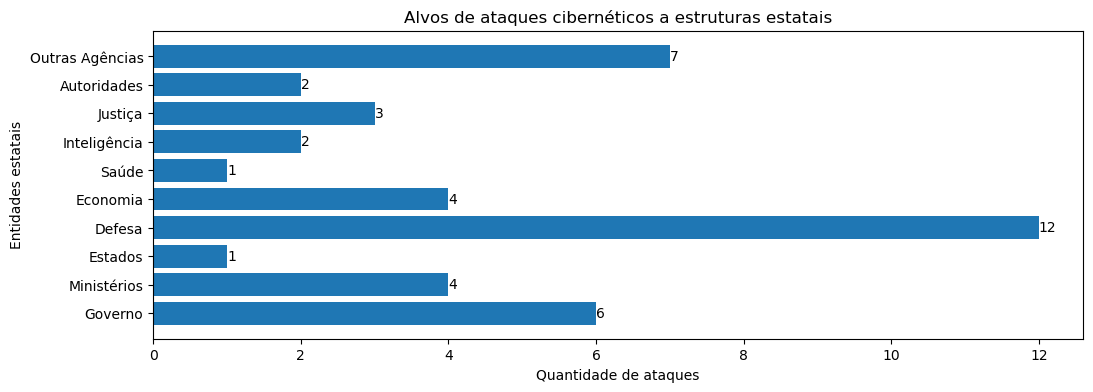

In [309]:
import matplotlib.pyplot as plt
import csv
array = []

# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[8]) == 2:
            continue
        else:
            for palavras in eval(linhas[8]):
                array.append(palavras)
array.sort()
array1 = set(array)
governo = ['White House','Senator','election','Census Bureau','government','President',]
ministerios = ['Foreign Ministry','DHS','ministries','State Department']
estadual = ['municipalities',]
defesa = ['military', 'Department of Defense','DOD','weapons systems','Air Force','Navy','DISA',
          'United States Cyber Command', 'Army', 'NSA','defense','defense organizations',]
economia = ['Internal Revenue Service','Department of Labor','Department of Commerce','Securities and Exchange Commission',]
saude = ['Department of Health',]
inteligencia = ['intelligence','CIA',]
justica = ['law enforcement agencies','Department of Justice','FBI',]
autoridades = ['diplomats','Chancellor',]
outrasAgencias = ['government_agencies','agencies','agency', 'Agency for International Development','OPM',
                 'Office of Personnel Management','NASA',]
eixox = ['Governo','Ministérios','Estados','Defesa','Economia','Saúde','Inteligência','Justiça','Autoridades','Outras Agências']
contGoverno = contMinisterios = contEstadual = contDefesa = contEconomia = contSaude = contInteligencia = contJustica = contAutoridades = contOutrasAgencias = 0

contGoverno = sum(1 for itens in governo if itens in array)
contMinisterios = sum(1 for itens in ministerios if itens in array)
contEstadual = sum(1 for itens in estadual if itens in array)
contDefesa = sum(1 for itens in defesa if itens in array)
contEconomia = sum(1 for itens in economia if itens in array)
contSaude = sum(1 for itens in saude if itens in array)
contInteligencia = sum(1 for itens in inteligencia if itens in array)
contJustica = sum(1 for itens in justica if itens in array)
contAutoridades = sum(1 for itens in autoridades if itens in array)
contOutrasAgencias = sum(1 for itens in outrasAgencias if itens in array)
eixoy = [contGoverno,contMinisterios, contEstadual, contDefesa, contEconomia, contSaude, contInteligencia, contJustica, contAutoridades, contOutrasAgencias]
plt.figure(figsize=(12, 4))
bars = plt.barh(eixox,eixoy)
# Adicionando os valores das contagens nas barras
for bar, count in zip(bars, eixoy):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), va='center', ha='left', color='black')
plt.title("Alvos de ataques cibernéticos a estruturas estatais")
plt.xlabel("Quantidade de ataques")
plt.ylabel("Entidades estatais")

#Salvando o arquivo
plt.savefig('1_03_AtqRecebidosEUAEstatais.png')

# Exibindo o gráfico
plt.show()


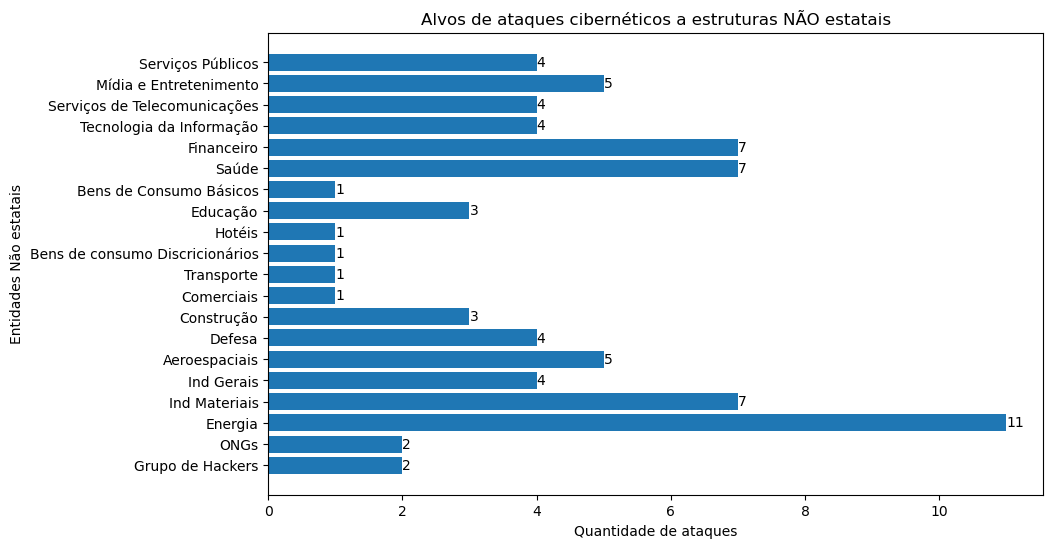

In [310]:
import matplotlib.pyplot as plt
import csv
array = []

# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[9]) == 2:
            continue
        else:
            for palavras in eval(linhas[9]):
                array.append(palavras)
array.sort()
array1 = set(array)
#Classificação das entidades não governamentais Empresas com base no Global Industry Classification Standard - GICS
gp_Hackers = ['Hackers','hackers','hacker','group of hackers','hacking group','Lazarus Group', 'Shadow Brokers','Cybercriminals','cyber criminals',
              'unknown hackers','cyber-intrusion campaign','Iran Cyber Army','insurgents',]
ongs = ['human rights activist','activist',]
energia = ['electric utility companies','electric utilities','energy companies','electric companies','energy','nuclear','energy facilities',
           'energy company','electrical utilities','electrical utility','power plants',]
materiais = ['petrochemical','manufacturing facilities','Alcoa','oil','gas','gas pipeline companie','gas pipelines',]
ind_geral = ['industry','industries','company','companies',]
aeroespaciais = ['aerospace industry','United Airlines','aviation','think_tanks','aerospace',]
defesa = ['defense firms','defense industrial base', 'contractors','contractor',]
construcao = ['construction', 'engineering','engineering companies',]
comerciais = ['law firm',]
transporte = ['Uber company',]
bensConsumoDisc = ['automotive', ]
hoteis = ['hotel',]
educacao = ['think_tank','universities','University','scientific research','research organizations',]
bensConsBas = ['Target supermarket',]
saude = ['medical','healthcare','pharmaceutical','health insurance','health','hospital','vaccine development','Community Health',]
financeiro = ['bank','Bank','SWIFT','ATM','finance','Equifax company','companyWesat','company Wesat','United States Chamber of Commerce',]
tecInfor = ['Microsoft','AOL','Yahoo company','computer hardware','Google',]
svTelecom = ['telecommunications company','Verizon','telecom companies','telecommunication companies','telecommunications',]
midiaEntr = ['journalists','media','Sony Pictures Entertainment','Wikileaks','FIFA','United States Soccer Federation',]
svPublicos = ['critical infrastructure','water','utility companies','infrastructure companies',]                
eixox = ['Grupo de Hackers','ONGs','Energia','Ind Materiais','Ind Gerais', 'Aeroespaciais','Defesa','Construção','Comerciais','Transporte',
        'Bens de consumo Discricionários','Hotéis', 'Educação','Bens de Consumo Básicos','Saúde','Financeiro',
         'Tecnologia da Informação','Serviços de Telecomunicações','Mídia e Entretenimento','Serviços Públicos']

#Contando cada classificação
contGpHackers = contONG = contEnergia = contMateriais = contIndGeral = contAeroespacial = contDefesa = contConstrucao = 0
contComerciais = contTransporte = contBensConsDisc = contHoteis = contEducacao = contBensConsBas = contSaude = 0
contFinanceiros = contTecInfor = contSvTelecom = contMidiaEntr = contSvPublicos = contPessoas = 0
contGpHackers = sum(1 for itens in gp_Hackers if itens in array)
contONG = sum(1 for itens in ongs if itens in array)
contEnergia = sum(1 for itens in energia if itens in array)
contMateriais = sum(1 for itens in materiais if itens in array)
contIndGeral = sum(1 for itens in ind_geral if itens in array)
contAeroespacial = sum(1 for itens in aeroespaciais if itens in array)
contDefesa = sum(1 for itens in defesa if itens in array)
contConstrucao = sum(1 for itens in construcao if itens in array)
contComerciais = sum(1 for itens in comerciais if itens in array)
contTransporte = sum(1 for itens in transporte if itens in array)
contBensConsDisc = sum(1 for itens in bensConsumoDisc if itens in array)
contHoteis = sum(1 for itens in hoteis if itens in array)
contEducacao = sum(1 for itens in educacao if itens in array)
contBensConsBas = sum(1 for itens in bensConsBas if itens in array)
contSaude = sum(1 for itens in saude if itens in array)
contFinanceiros = sum(1 for itens in financeiro if itens in array)
contTecInfor = sum(1 for itens in tecInfor if itens in array)
contSvTelecom = sum(1 for itens in svTelecom if itens in array)
contMidiaEntr = sum(1 for itens in midiaEntr if itens in array)
contSvPublicos = sum(1 for itens in svPublicos if itens in array)
eixoy=[contGpHackers, contONG, contEnergia, contMateriais, contIndGeral, contAeroespacial, contDefesa, contConstrucao,
       contComerciais, contTransporte, contBensConsDisc, contHoteis, contEducacao, contBensConsBas, contSaude,
       contFinanceiros, contTecInfor, contSvTelecom, contMidiaEntr, contSvPublicos]
#Confeccionando o gráfico
plt.figure(figsize=(10, 6))
bars = plt.barh(eixox,eixoy)
# Adicionando os valores das contagens nas barras
for bar, count in zip(bars, eixoy):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), va='center', ha='left', color='black')
#Formatação
plt.title("Alvos de ataques cibernéticos a estruturas NÃO estatais")
plt.xlabel("Quantidade de ataques")
plt.ylabel("Entidades Não estatais")
#Salvando o arquivo
plt.savefig('1_04_AtqRecebidosEUANaoEstatais.png')

# Exibindo o gráfico
plt.show()

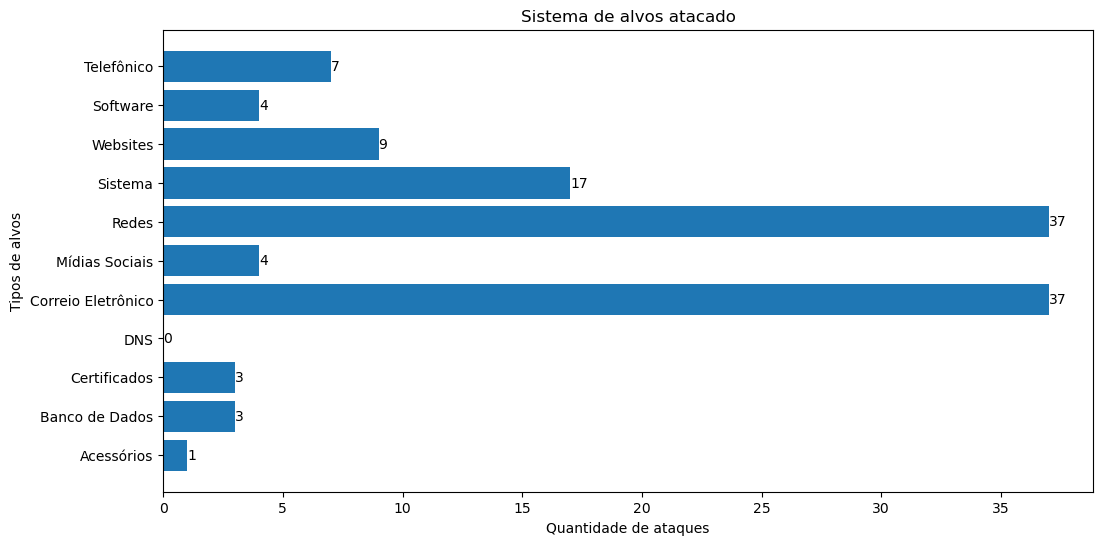

In [311]:
import matplotlib.pyplot as plt
import csv
array = []

# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-3]) == 2:
            continue
        else:
            for palavras in eval(linhas[-3]):
                array.append(palavras)
array.sort()
array1 = set(array)
#Formando o banco de palavras
acessorios = ['Camera', 'decoder', 'USB', 'iot','flash memory',]
bd = ['Database', 'database', 'oracle',]
certificados = ['Certificate', 'certificate', 'factor','credential',]
dns = ['DNS', 'Direction','direction', 'redirection', 'domain',]
mail = ['Mail','e-mail','email', 'gmail', 'account',]
socialMedia = ['Social media','social media', 'Facebook', 'Twitter', 'Whatsapp', 'Telegram',]
redes = ['satellite','network','submarine cable',]
sistemas = ['computer system','servers','computer',]
websites = ['websites','URL', 'page', 'blog',]
software = ['software', 'application',]
telefonico = ['mobile phone','phone','smartphone', 'tablet',]

eixox = ['Acessórios', 'Banco de Dados','Certificados','DNS','Correio Eletrônico','Mídias Sociais','Redes','Sistema',
        'Websites','Software','Telefônico']

#Contadores
contAcessorios = contBd = contCert = contDNS = contMail = contSM = contRedes = contSist = contWebs = contSw = contTel = 0

contAcessorios = sum(1 for itens in acessorios for palavras in array if itens == palavras)
contBd = sum(1 for itens in bd for palavras in array if itens == palavras)
contCert = sum(1 for itens in certificados for palavras in array if itens == palavras)
contDNS = sum(1 for itens in dns for palavras in array if itens == palavras)
contMail = sum(1 for itens in mail for palavras in array if itens == palavras)
contSM = sum(1 for itens in socialMedia for palavras in array if itens == palavras)
contRedes = sum(1 for itens in redes for palavras in array if itens == palavras)
contSist = sum(1 for itens in sistemas for palavras in array if itens == palavras)
contWebs = sum(1 for itens in websites for palavras in array if itens == palavras)
contSw = sum(1 for itens in software for palavras in array if itens == palavras)
contTel = sum(1 for itens in telefonico for palavras in array if itens == palavras)

eixoy = [contAcessorios, contBd, contCert, contDNS, contMail, contSM, contRedes, contSist, contWebs, contSw, contTel,]

#Formando o gráfico
plt.figure(figsize=(12,6))
bars = plt.barh(eixox,eixoy)
# Adicionando os valores das contagens nas barras
for bar, count in zip(bars, eixoy):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), va='center', ha='left', color='black')
#Formatação
plt.title("Sistema de alvos atacado")
plt.xlabel("Quantidade de ataques")
plt.ylabel("Tipos de alvos")
#Salvando o arquivo
plt.savefig('1_05_AtqRecebidosEUATiposAlvos.png')

# Exibindo o gráfico
plt.show()

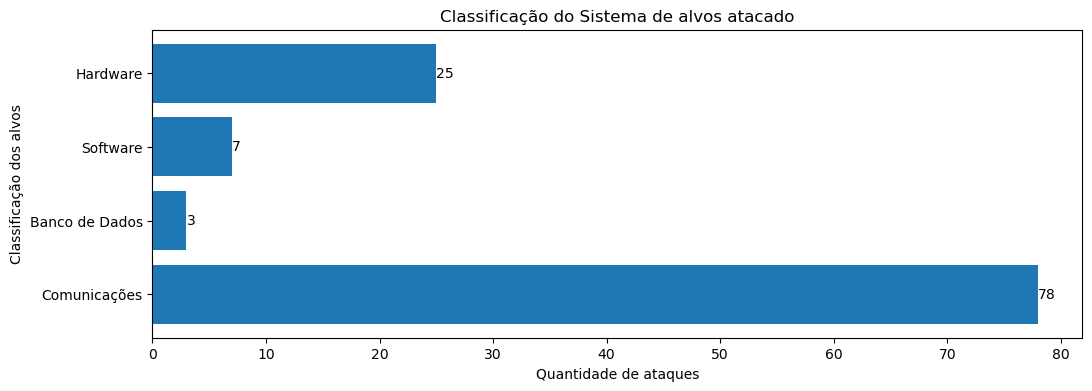

In [312]:
import matplotlib.pyplot as plt
import csv
array = []

# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-3]) == 2:
            continue
        else:
            for palavras in eval(linhas[-3]):
                array.append(palavras)
array.sort()
array1 = set(array)
#Formando o banco de palavras
acessorios = ['Camera', 'decoder', 'USB', 'iot','flash memory',]
bd = ['Database', 'database', 'oracle',]
certificados = ['Certificate', 'certificate', 'factor','credential',]
dns = ['DNS', 'Direction','direction', 'redirection', 'domain',]
mail = ['Mail','e-mail','email', 'gmail', 'account',]
socialMedia = ['Social media','social media', 'Facebook', 'Twitter', 'Whatsapp', 'Telegram',]
redes = ['satellite','network','submarine cable',]
sistemas = ['computer system','servers','computer',]
websites = ['websites','URL', 'page', 'blog',]
software = ['software', 'application',]
telefonico = ['mobile phone','phone','smartphone', 'tablet',]

eixox = ['Comunicações', 'Banco de Dados','Software','Hardware']

#Contadores
contAcessorios = contBd = contCert = contDNS = contMail = contSM = contRedes = contSist = contWebs = contSw = contTel = 0

contAcessorios = sum(1 for itens in acessorios for palavras in array if itens == palavras)
contBd = sum(1 for itens in bd for palavras in array if itens == palavras)
contCert = sum(1 for itens in certificados for palavras in array if itens == palavras)
contDNS = sum(1 for itens in dns for palavras in array if itens == palavras)
contMail = sum(1 for itens in mail for palavras in array if itens == palavras)
contSM = sum(1 for itens in socialMedia for palavras in array if itens == palavras)
contRedes = sum(1 for itens in redes for palavras in array if itens == palavras)
contSist = sum(1 for itens in sistemas for palavras in array if itens == palavras)
contWebs = sum(1 for itens in websites for palavras in array if itens == palavras)
contSw = sum(1 for itens in software for palavras in array if itens == palavras)
contTel = sum(1 for itens in telefonico for palavras in array if itens == palavras)

contComunicacoes = contDNS + contMail + contSM + contRedes
contBD = contBd
contSws = contCert + contSw
contHws = contAcessorios + contSist + contTel

eixoy = [contComunicacoes, contBD, contSws, contHws]

#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(eixox,eixoy)
# Adicionando os valores das contagens nas barras
for bar, count in zip(bars, eixoy):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), va='center', ha='left', color='black')
#Formatação
plt.title("Classificação do Sistema de alvos atacado")
plt.xlabel("Quantidade de ataques")
plt.ylabel("Classificação dos alvos")
#Salvando o arquivo
plt.savefig('1_06_AtqRecebidosEUAJuncaoTiposAlvos.png')

# Exibindo o gráfico
plt.show()

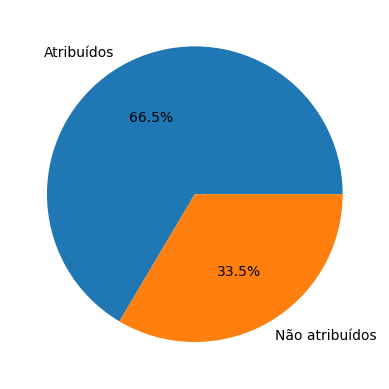

In [313]:
import matplotlib.pyplot as plt
import csv
nConhecidos = 0
conhecidos = 0
# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    for linhas in leitor:
        if len(linhas[4]) == 2:
            nConhecidos += 1
        else:
            conhecidos += 1
titulos = ['Atribuídos','Não atribuídos']
dados = [conhecidos,nConhecidos]
pif, ax = plt.subplots()
#Mostrar as porcentagens de cada
ax.pie(dados, labels=titulos, autopct='%1.1f%%')
#Salvando o arquivo
plt.savefig('1_07_AtqRecebidosEUAAtribuicao.png')
plt.show()

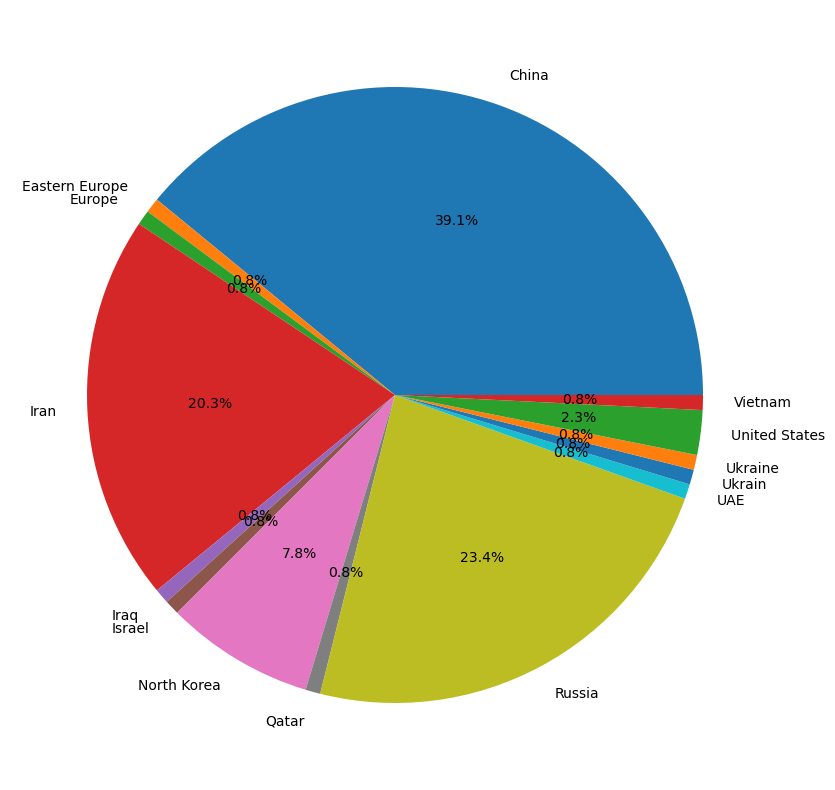

In [314]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[4]) == 2:
            continue
        else:
            for palavras in eval(linhas[4]):
                array.append(palavras)
array.sort()
#print(array)
array1 = list(set(array))
array1.sort()
titulos = array1
contaPaises = []
for paises in array1:
    i = 0
    for itens in array:
        if paises == itens:
            i += 1
    contaPaises.append(i)
dados = contaPaises
pif, ax = plt.subplots(figsize=(10, 10))
#Mostrar as porcentagens de cada
ax.pie(dados, labels=titulos, autopct='%1.1f%%')
#Salvando o arquivo
plt.savefig('1_08_AtqRecebidosEUAPcpAtacantes.png')
plt.show()

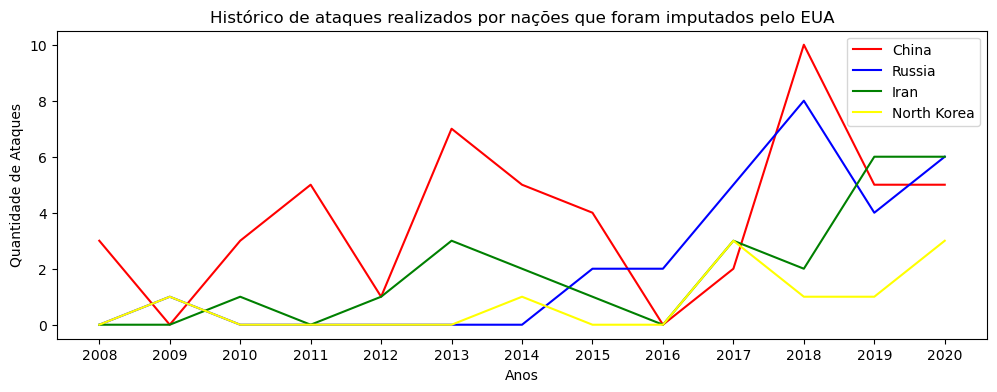

In [315]:
import matplotlib.pyplot as plt
import csv
anoAtacante = []
anos = []
arrayChina = []
arrayRussia = []
arrayIran = []
arrayNK = []
# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[4]) == 2:
            continue
        else:
            anos.append(linhas[1])
            dado = linhas[1]+","+linhas[4]
            anoAtacante.append(dado)
anos = list(set(anos))
anos.sort()
for ano in anos:
    contChina = contRussia = contIran = contNK = 0
    for itens in anoAtacante:
        a = eval(itens)
        if int(ano) == int(a[0]): 
            if 'China' in a[1]:
                contChina += 1
            elif 'Russia' in a[1]:
                contRussia += 1
            elif 'Iran' in a[1]:
                contIran += 1
            elif 'North Korea' in a[1]:
                contNK += 1
    arrayChina.append(contChina)
    arrayRussia.append(contRussia)
    arrayIran.append(contIran)
    arrayNK.append(contNK)
plt.figure(figsize=(12,4))
plt.plot(anos,arrayChina,label='China',color='red')
plt.plot(anos,arrayRussia,label='Russia',color='blue')
plt.plot(anos,arrayIran,label='Iran',color='green')
plt.plot(anos,arrayNK,label='North Korea',color='yellow')
plt.title("Histórico de ataques realizados por nações que foram imputados pelo EUA")
plt.xlabel("Anos")
plt.ylabel("Quantidade de Ataques")
#Salvando o arquivo
plt.savefig('1_09_AtqRecebidosEUAAtacantesxAno.png')
plt.legend()

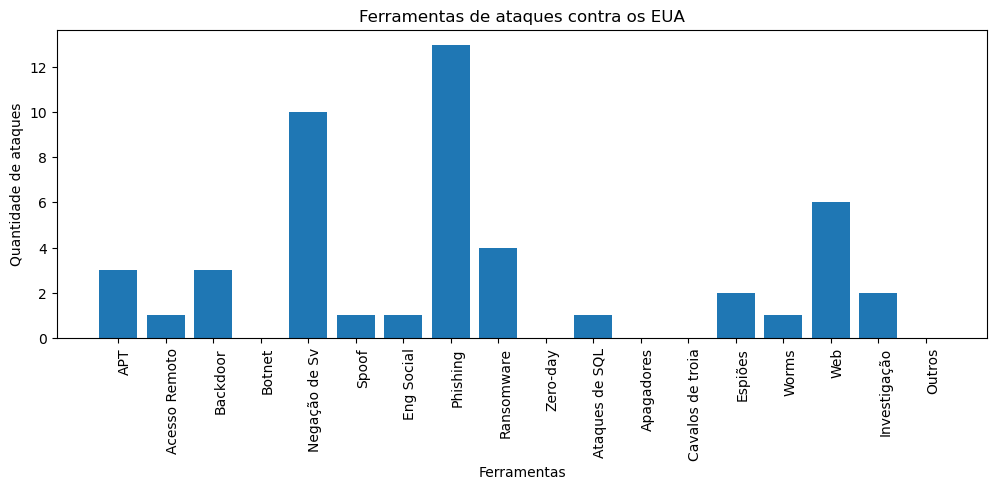

In [316]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-4]) == 2:
            continue
        else:
            lista = eval(linhas[-4])
            for palavras in lista:
                array.append(palavras)
array.sort()
array1 = list(set(array))
array1.sort()

#Classificando
apt = ['APT', 'complex', 'advanced', 'persistent','persistent cyberattacks',]
acessoRemoto = ['Remote Access','remote Access', 'remote control',]
backdoor = ['backdoor',]
botnet = ['Bot', 'bot','robot','botnet',]
denial = ['DoS','DDoS', 'distributed', 'denial', 'traffic','denial-of-service','denial of service',]
spoof = ['DNS', 'spoof', 'redirect', 'domain', 'direction',]
engSoc = ['Social engineering', 'fake',]
phishing = ['phishing','spear phishing','spear-phishing',]
ransomware = ['ransomware',]
zeroDay = ['zero day', 'zero-day',]
sqlInjection = ['SQL', 'injection','SQL injection',]
apagadores = ['wiper',]
trojan = ['trojan',]
spyware = ['spyware','spy','keylogger','screenlogger',]
worm = ['worm','spread',]
web = ['URL','websites',]
investigacao = ['Forensic',]
geral = ['virus','malware',]

titulo = ['APT', 'Acesso Remoto', 'Backdoor','Botnet','Negação de Sv','Spoof','Eng Social','Phishing','Ransomware',
         'Zero-day','Ataques de SQL', 'Apagadores', 'Cavalos de troia', 'Espiões','Worms','Web','Investigação','Outros']

#Contador
contApt = contAcessoRemoto = contBackdoor = contBotnet = contDenial = contSpoof = contES = contPhishing = contRansomware = 0
contZD = contSQLI = contApagadores = contTrojan = contSpyware = contWorm = contWeb = contInv = contGeral = 0

contApt = sum(1 for itens in apt for palavras in array if itens == palavras)
contAcessoRemoto = sum(1 for itens in acessoRemoto for palavras in array if itens == palavras)
contBackdoor = sum(1 for itens in backdoor for palavras in array if itens == palavras)
contBotnet = sum(1 for itens in botnet for palavras in array if itens == palavras)
contDenial = sum(1 for itens in denial for palavras in array if itens == palavras)
contSpoof = sum(1 for itens in spoof for palavras in array if itens == palavras)
contES = sum(1 for itens in engSoc for palavras in array if itens == palavras)
contPhishing = sum(1 for itens in phishing for palavras in array if itens == palavras)
contRansomware = sum(1 for itens in ransomware for palavras in array if itens == palavras)
contZD = sum(1 for itens in zeroDay for palavras in array if itens == palavras)
contSQLI = sum(1 for itens in sqlInjection for palavras in array if itens == palavras)
contApagadores = sum(1 for itens in apagadores for palavras in array if itens == palavras)
contTrojan = sum(1 for itens in trojan for palavras in array if itens == palavras)
contSpyware = sum(1 for itens in spyware for palavras in array if itens == palavras)
contWorm = sum(1 for itens in worm for palavras in array if itens == palavras)
contWeb = sum(1 for itens in web for palavras in array if itens == palavras)
contInv = sum(1 for itens in investigacao for palavras in array if itens == palavras)
contGeral = sum(1 for itens in geral for palavras in array if itens == palavras)

dados = [contApt, contAcessoRemoto, contBackdoor, contBotnet, contDenial, contSpoof, contES, contPhishing, contRansomware,
         contZD, contSQLI, contApagadores, contTrojan, contSpyware, contWorm, contWeb, contInv, contGeral]
#Gráfico
plt.figure(figsize=(12,4))
bars = plt.bar(titulo,dados)
plt.xticks(rotation=90, ha='left')
#Especificação
plt.title("Ferramentas de ataques contra os EUA")
plt.xlabel("Ferramentas")
plt.ylabel("Quantidade de ataques")
#Salvando
plt.savefig('1_10_AtqRecebidosEUAFerramentas.png')
plt.show()

['Ataque Cibernético', 'Crime Cibernético', 'Guerra Cibernética', 'Indefinido', 'Inteligência Cibernética']
[43, 65, 11, 56, 7]


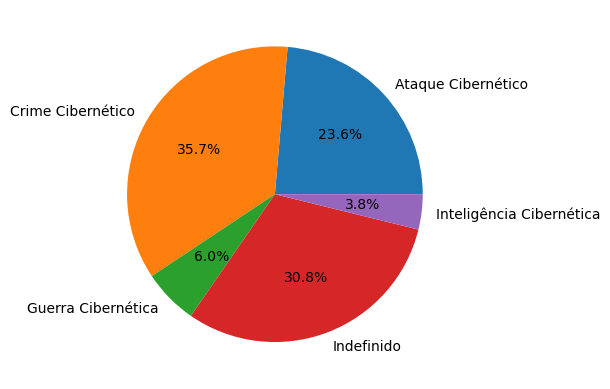

In [329]:
import matplotlib.pyplot as plt
import csv
array = []
contagem = []
# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        #Exclusão quando é apenas uma atribuição cibernética
        if linhas[-1] == 'Não é uma ação cibernética':
            continue
        else:
            array.append(linhas[-1])
array.sort()
array1 = list(set(array))
array1.sort()

for tipos in array1:
    contador = 1
    for itens in array:
        if tipos == itens:
            #print("Classificação: ", tipos, " Itens: ", itens," Contador: ", contador)
            contador += 1
    contagem.append(contador)

#Fazendo o grafico
pif, ax = plt.subplots()
#Mostrar as porcentagens de cada
ax.pie(contagem, labels=array1, autopct='%1.1f%%')
#Salvando o arquivo
plt.savefig('1_11_AtqRecebidosEUAAcoesCiber.png')
plt.show()
            

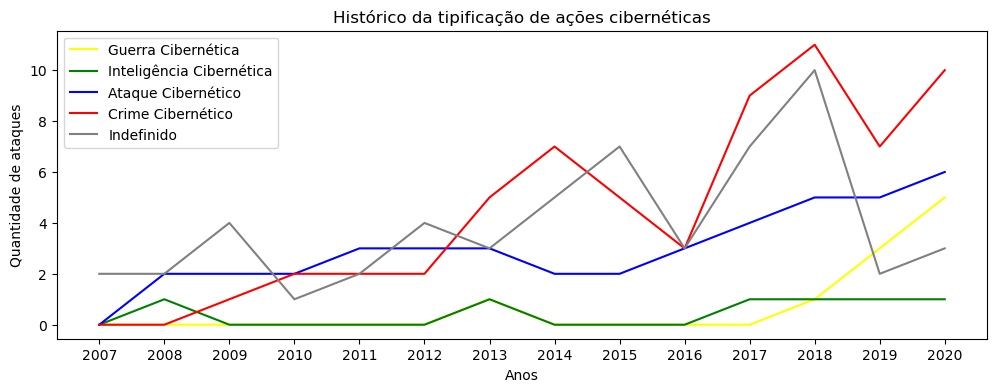

In [350]:
import matplotlib.pyplot as plt
import csv
anos = []
array = []
arrayGCiber = []
arrayIntlgCiber = []
arrayAtqCiber = []
arrayCriCiber = []
arrayInd = []
# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
                #Exclusão quando é apenas uma atribuição cibernética
        if linhas[-1] == 'Não é uma ação cibernética':
            continue
        else:
            anos.append(linhas[1])
            lista = "\'"+linhas[1]+"\',\'"+linhas[-1]+"\'"
            array.append(lista)

#Eixo da absciças
anos = list(set(anos))
anos.sort()

#Eixo da ordenada
array.sort()
for ano in anos:
    contGC = contIC = contAC = contCC = contInd = 0
    for itens in array:        
        elemento = eval(itens)
        if int(ano) == int(elemento[0]):
            if elemento[1] == 'Guerra Cibernética':
                contGC += 1
            elif elemento[1] == 'Inteligência Cibernética':
                contIC += 1
            elif elemento[1] == 'Ataque Cibernético':
                contAC += 1
            elif elemento[1] == 'Crime Cibernético':
                contCC += 1
            elif elemento[1] == 'Indefinido':
                contInd += 1
    arrayGCiber.append(contGC)
    arrayIntlgCiber.append(contIC)
    arrayAtqCiber.append(contAC)
    arrayCriCiber.append(contCC)
    arrayInd.append(contInd)
    
#Fazendo o gráfico
plt.figure(figsize=(12,4))
plt.plot(anos,arrayGCiber,label='Guerra Cibernética',color='yellow')
plt.plot(anos,arrayIntlgCiber,label='Inteligência Cibernética', color = 'green')
plt.plot(anos,arrayAtqCiber,label='Ataque Cibernético',color='blue')
plt.plot(anos,arrayCriCiber,label='Crime Cibernético', color = 'red')
plt.plot(anos,arrayInd,label='Indefinido',color='gray')

#Personalizando o gráfico
plt.title("Histórico da tipificação de ações cibernéticas")
plt.xlabel("Anos")
plt.ylabel("Quantidade de ataques")
plt.legend()

#Salvando
plt.savefig('1_12_AtqRecebidosEUAAcoesCiberXAno.png')
plt.show()

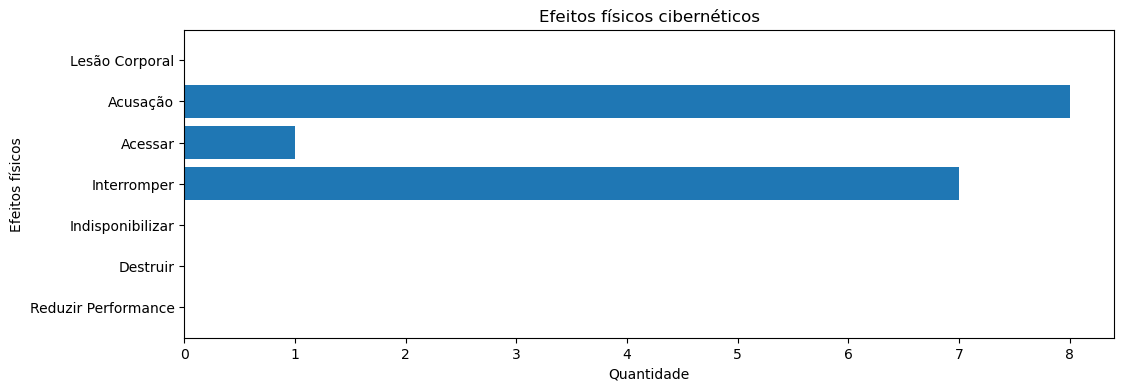

In [368]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-2])==2:
            continue
        else:
            lista = eval(linhas[-2])
            for elemento in lista:
                array.append(elemento)
array.sort()

#EIXO X
#EFEITO FÍSICO
#Degradar ou Reduzir a performance
redPerf =['reduced physical performance', 'phisicly performance',]
#Destruir
dest = ['destroyed', 'burned',]
#indisponibilizar
ind =['take down',]
#interromper
interromper= ['internet traffic','DoS','DDoS',]
#Acessar
acessar=['flash memory','USB',]
#Acusação
acusacao=['indicted','indictment','charged','ascribed',]
#Lesão corporal
lesCorp = ['die', 'bodly injure',]

titulo = ['Reduzir Performance','Destruir','Indisponibilizar','Interromper','Acessar','Acusação','Lesão Corporal']

#EIXO Y
contRedPerf = contDest = contInd = contInterromper = contAcessar = contAcusacao = contLesCorp = 0

contRedPerf = sum(1 for itens in redPerf for palavras in array if itens == palavras)
contDest = sum(1 for itens in dest for palavras in array if itens == palavras)
contInd = sum(1 for itens in ind for palavras in array if itens == palavras)
contInterromper = sum(1 for itens in interromper for palavras in array if itens == palavras)
contAcessar = sum(1 for itens in acessar for palavras in array if itens == palavras)
contAcusacao = sum(1 for itens in acusacao for palavras in array if itens == palavras)
contLesCorp = sum(1 for itens in lesCorp for palavras in array if itens == palavras)

dados=[contRedPerf, contDest, contInd, contInterromper, contAcessar, contAcusacao, contLesCorp]

#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(titulo,dados)
plt.title("Efeitos físicos cibernéticos")
plt.xlabel("Quantidade")
plt.ylabel("Efeitos físicos")

#Salvando
plt.savefig('1_13_AtqRecebidosEUAEfeitoFisico.png')
plt.show()

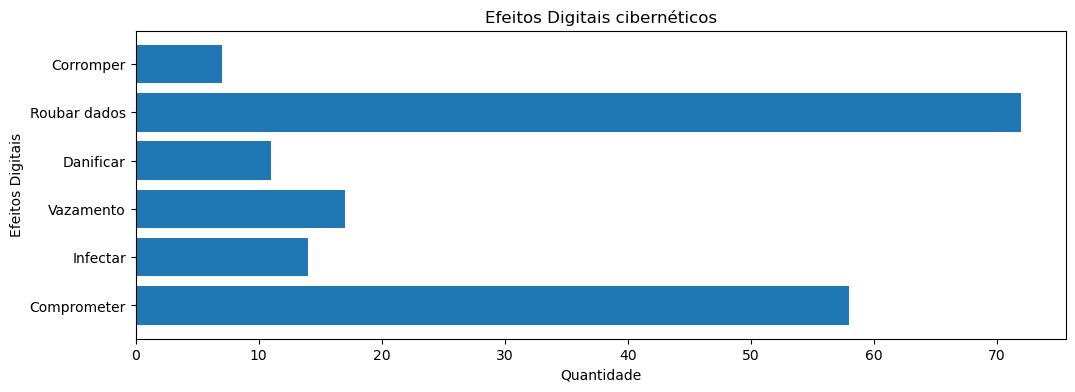

In [369]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-2])==2:
            continue
        else:
            lista = eval(linhas[-2])
            for elemento in lista:
                array.append(elemento)
array.sort()

#EIXO X
#DIGITAL
#Comprometer (acesso não autorizado)
comp=['breach','breached', 'compromising',  'disruption','compromise','gain access','gain unauthorized access','disrupt',
      'gained access','penetrated','interfered','try to steal', 'attempt to steal', 'monitor','penetrate', 'intrusion',]
#Infectar
inf=['exploiting', 'backdoor', 'malware', 'SQL', 'injection','SQL injection',]
#vazamento
vaz=['publish','data breach', 'leaking','exposing', 'release', 'publish',]
#Danificar / Indisponibilizar
danif=['botnet', 'DDoS','DoS', 'flood of traffic', 'network disrupted', 'disrupted their operations', 
       'growing volume of cyber activity', 'lock', 'shut down',]
#roubar dados
rob =['exfiltrate data','espionage','personal information','steal information','accessed data',
      'collect', 'eavesdrop','steal personal and financial data','exfiltrate','were taken', 'steal','stole',
      'obtained','download','gather',]
#Corromper
corrom=['ransomware', 'crippled', 'rebuilt', 'loss registry', 'skew',]

titulo=['Comprometer','Infectar','Vazamento','Danificar','Roubar dados','Corromper']

#EIXOY
contComp = contInf = contVaz = contDanif = contRob = contCorrom = 0

contComp = sum(1 for itens in comp for palavras in array if itens == palavras)
contInf = sum(1 for itens in inf for palavras in array if itens == palavras)
contVaz = sum(1 for itens in vaz for palavras in array if itens == palavras)
contDanif = sum(1 for itens in danif for palavras in array if itens == palavras)
contRob = sum(1 for itens in rob for palavras in array if itens == palavras)
contCorrom = sum(1 for itens in corrom for palavras in array if itens == palavras)

dados=[contComp,contInf,contVaz,contDanif,contRob,contCorrom]


#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(titulo,dados)
plt.title("Efeitos Digitais cibernéticos")
plt.xlabel("Quantidade")
plt.ylabel("Efeitos Digitais")

#Salvando
plt.savefig('1_14_AtqRecebidosEUAEfeitoDigital.png')
plt.show()

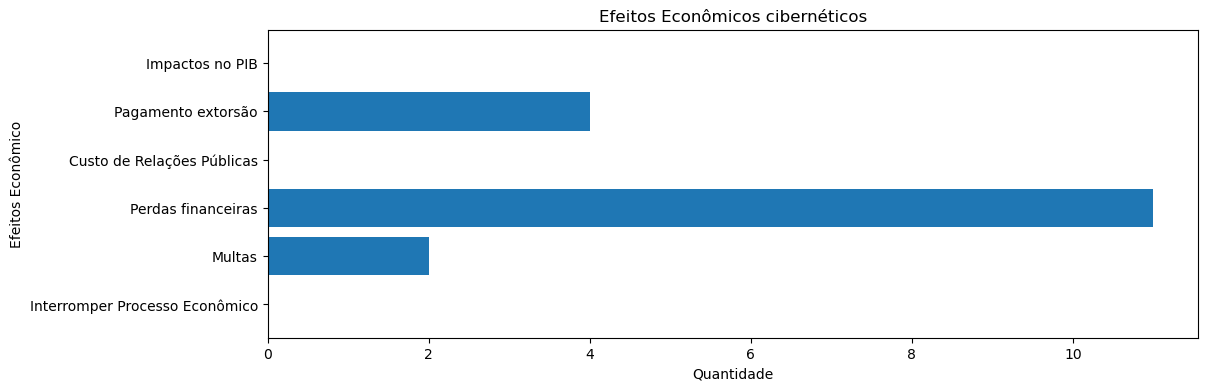

In [371]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-2])==2:
            continue
        else:
            lista = eval(linhas[-2])
            for elemento in lista:
                array.append(elemento)
array.sort()

#EIXO X
#ECONOMICO
#Interromper processo econômico
interromper=['Economic process interrupted',]
#Multas regulatórias
multas=['fines','sanctions', 'sconce', 'amerce', 'mulct',]
#perdas financeiras ou de capital
perdas=['stealing money', 'fraud','stolen money','dollars','intellectual property', 'commercial secrets', 'intellectual property',]
#Custo de resposta de RP
rp=['Public Relations', 'images costs',]
#Pagamento de extorsão
extor = ['payment', 'repayment','ransomware',]
#Impactos negativos sobre o PIB
gdp=['GDP',]

titulo=['Interromper Processo Econômico','Multas','Perdas financeiras','Custo de Relações Públicas','Pagamento extorsão','Impactos no PIB']

#EIXOY
contInt = contMultas = contPerdas = contRP = contExtor = contGdp = 0

contInt = sum(1 for itens in interromper for palavras in array if itens == palavras)
contMultas = sum(1 for itens in multas for palavras in array if itens == palavras)
contPerdas = sum(1 for itens in perdas for palavras in array if itens == palavras)
contRP = sum(1 for itens in rp for palavras in array if itens == palavras)
contExtor = sum(1 for itens in extor for palavras in array if itens == palavras)
contGdp = sum(1 for itens in gdp for palavras in array if itens == palavras)

dados=[contInt,contMultas,contPerdas,contRP,contExtor,contGdp]


#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(titulo,dados)
plt.title("Efeitos Econômicos cibernéticos")
plt.xlabel("Quantidade")
plt.ylabel("Efeitos Econômico")

#Salvando
plt.savefig('1_15_AtqRecebidosEUAEfeitoEconomico.png')
plt.show()

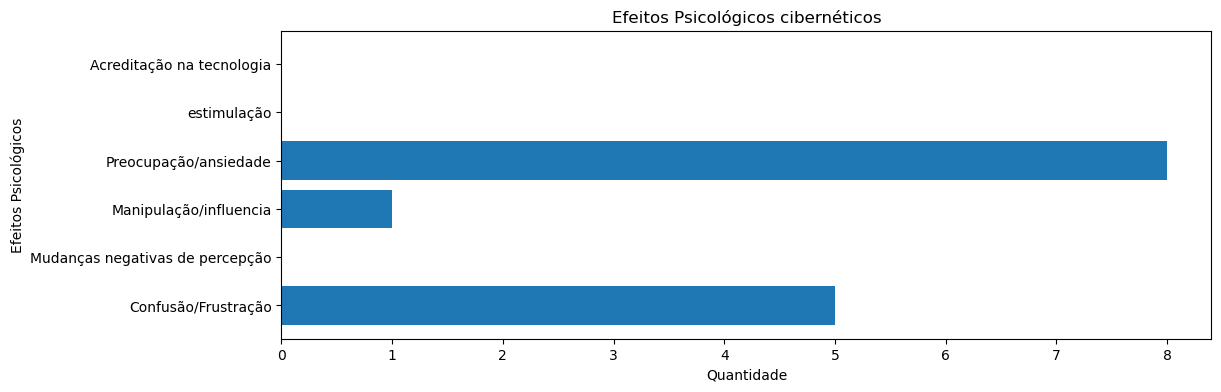

In [372]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-2])==2:
            continue
        else:
            lista = eval(linhas[-2])
            for elemento in lista:
                array.append(elemento)
array.sort()

#EIXO X
#Psicológicos
#Confusão/Frustração
conf=['fake news', 'false information', 'disinformation', 'skew',] 
#Mudanças negativas de percepção
perc=['perception change', 'sense modify',]
#Manipulação/influência
infl=['Trump campaign', 'Hilary campaign', 'political campaign', 'Democrats', 'Republicans',]
#Preocupação/ ansiedade
ans=['intimidation', 'alert', 'warning',]
#estimulação
det=['deterrent','stimulation','dissuasion',]
#Acreditação na tecnologia
tec=['tecnology believe', 'tecnology accreditation','science accreditation',]

titulo=['Confusão/Frustração','Mudanças negativas de percepção','Manipulação/influencia','Preocupação/ansiedade',
       'estimulação','Acreditação na tecnologia']

#EIXOY
contConf = contPerc = contInfl = contAns = contDet = contTec = 0

contConf = sum(1 for itens in conf for palavras in array if itens == palavras)
contPerc = sum(1 for itens in perc for palavras in array if itens == palavras)
contInfl = sum(1 for itens in infl for palavras in array if itens == palavras)
contAns = sum(1 for itens in ans for palavras in array if itens == palavras)
contDet = sum(1 for itens in det for palavras in array if itens == palavras)
contTec =sum(1 for itens in tec for palavras in array if itens == palavras)

dados=[contConf,contPerc,contInfl, contAns,contDet,contTec]

#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(titulo,dados)
plt.title("Efeitos Psicológicos cibernéticos")
plt.xlabel("Quantidade")
plt.ylabel("Efeitos Psicológicos")

#Salvando
plt.savefig('1_16_AtqRecebidosEUAEfeitoPsc.png')
plt.show()

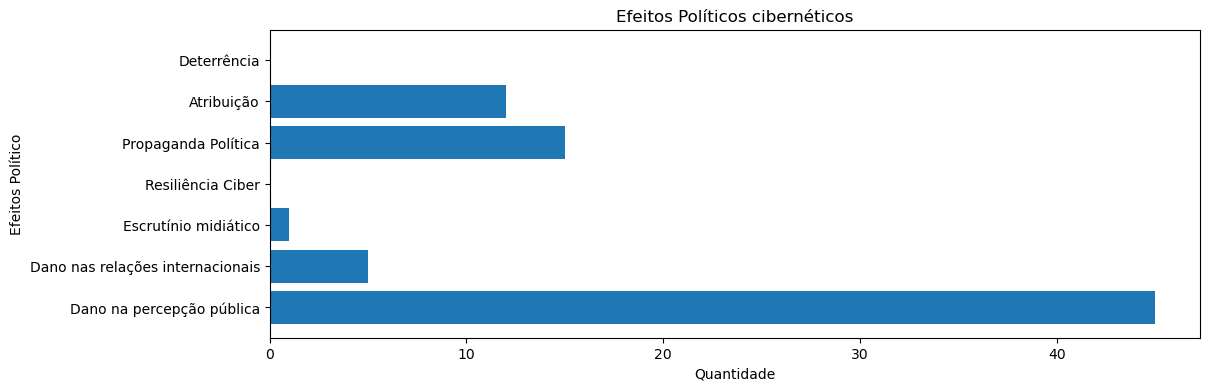

In [378]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-2])==2:
            continue
        else:
            lista = eval(linhas[-2])
            for elemento in lista:
                array.append(elemento)
array.sort()

#EIXO X
#POLÍTICO / REPUTACIONAL
#dano na percepção pública
percPub=['government','municipality', 'municipalities', 'agency','agencies', 'ministery',] 
#dano nas relações internacionais
dano=['blame','accuse','false information about']
#Escrutínio midiático
escr=['Wikileaks', 'media attention','New York Times','Washington Post',]
#Redução do status da resiliência ciber
resCiber=['cyber resilience',]
#Propaganda política
propPol=['intimidation campaign', 'election',]
#atribuição
atr=['indicted','indictment','charged','ascribed','accuse',]
#Deterrência
det=['deterrence','dissuasion',]

titulo=['Dano na percepção pública','Dano nas relações internacionais','Escrutínio midiático','Resiliência Ciber',
       'Propaganda Política','Atribuição','Deterrência']

#EIXOY
contPerc = contDano = contEscr = contResCiber = contPropPol = contAtr = contDet = 0

contPerc = sum(1 for itens in percPub for palavras in array if itens == palavras)
contDano = sum(1 for itens in dano for palavras in array if itens == palavras)
contEscr = sum(1 for itens in escr for palavras in array if itens == palavras)
contResCiber = sum(1 for itens in resCiber for palavras in array if itens == palavras)
contPropPol = sum(1 for itens in propPol for palavras in array if itens == palavras)
contAtr = sum(1 for itens in atr for palavras in array if itens == palavras)
contDet = sum(1 for itens in det for palavras in array if itens == palavras)

dados=[contPerc, contDano, contEscr, contResCiber, contPropPol, contAtr, contDet]

#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(titulo,dados)
plt.title("Efeitos Políticos cibernéticos")
plt.xlabel("Quantidade")
plt.ylabel("Efeitos Político")

#Salvando
plt.savefig('1_17_AtqRecebidosEUAEfeitoPolitico.png')
plt.show()

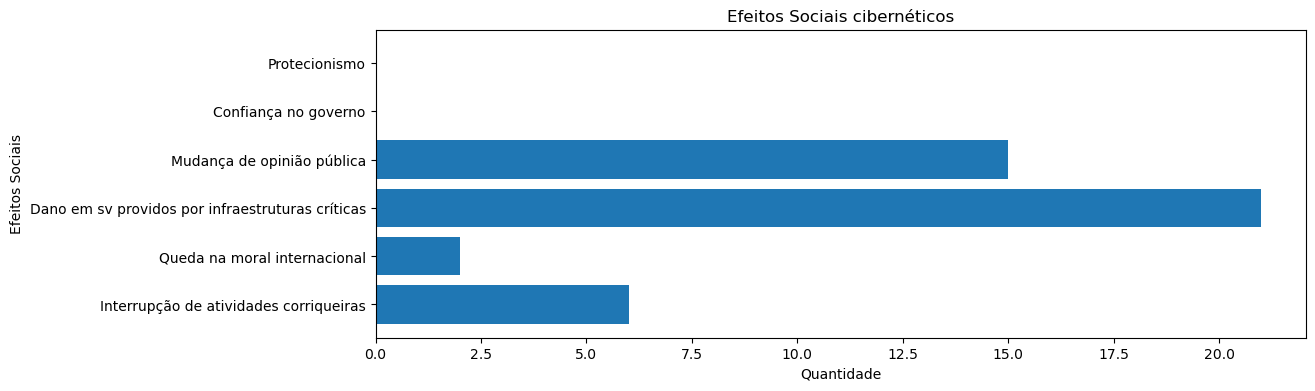

In [379]:
import matplotlib.pyplot as plt
import csv
array = []
# Abrindo o arquivo CSV
with open('baseAtacado.csv','r',encoding='utf-8') as entrada:
    leitor = csv.reader(entrada)
    next(leitor)
    for linhas in leitor:
        if len(linhas[-2])==2:
            continue
        else:
            lista = eval(linhas[-2])
            for elemento in lista:
                array.append(elemento)
array.sort()

#EIXO X
#SOCIAL/SOCIETAL
#Interrupção de atividades corriqueiras
atvC =['medical', 'utility companies','Uber',]
#Queda na moral internacional
moral=['false information',]
#Dano em serviços providos por infraestruturas críticas
danoIC=['critical infrastructure','restricted Internet access','infrastructure companies','electric utility companies',
                'electric utilities','energy companies','electric companies','energy','nuclear','energy facilities',
                'energy company','electrical utilities','electrical utility','power plants',]
#Mudança de opinião pública
opiniao=['information operations','election', 'public opinion', 'uprising', 'rebellion', 'insurgency',]
#Confiança no governo
conf=['bilateral agreement','trust in government',]
#Protecionismo
prot=['social proteccionism']

titulo=['Interrupção de atividades corriqueiras','Queda na moral internacional',
        'Dano em sv providos por infraestruturas críticas','Mudança de opinião pública','Confiança no governo',
       'Protecionismo']

#EIXOY
contAtvC = contMoral = contDanoIC = contOpiniao = contConf = contProt = 0

contAtvC = sum(1 for itens in atvC for palavras in array if itens == palavras)
contMoral = sum(1 for itens in moral for palavras in array if itens == palavras)
contDanoIC = sum(1 for itens in danoIC for palavras in array if itens == palavras)
contOpiniao = sum(1 for itens in opiniao for palavras in array if itens == palavras)
contConf = sum(1 for itens in conf for palavras in array if itens == palavras)
contProt = sum(1 for itens in prot for palavras in array if itens == palavras)

dados=[contAtvC, contMoral, contDanoIC, contOpiniao, contConf, contProt]

#Formando o gráfico
plt.figure(figsize=(12,4))
bars = plt.barh(titulo,dados)
plt.title("Efeitos Sociais cibernéticos")
plt.xlabel("Quantidade")
plt.ylabel("Efeitos Sociais")

#Salvando
plt.savefig('1_18_AtqRecebidosEUAEfeitoSocial.png')
plt.show()